# Step 1: Load the libraries

In [74]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans
import os

# Step 2: Load the Image


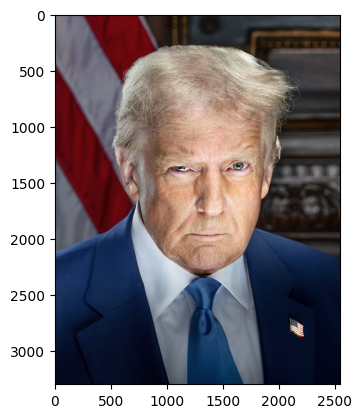

In [75]:
image = cv2.imread(r"C:\Users\rhyth\Desktop\open_cv\Histograms & K-Means for Dominant Colors\TrumpPortrait.jpg")
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(image)
plt.show()

"First, we load the image using OpenCV. Since OpenCV loads images in BGR format, we convert it to RGB for correct color display."

 # Step 3: Preprocess for K-Means
 "We reshape the image into a 2D array where each row is a pixel, and each column is a color channel—Red, Green, and Blue."

In [76]:
reshaped_image = image.reshape((-1, 3))


In [77]:
image

array([[[114, 113, 121],
        [119, 118, 126],
        [105, 102, 111],
        ...,
        [ 55,  66,  72],
        [ 65,  76,  82],
        [ 66,  77,  83]],

       [[115, 114, 122],
        [108, 107, 115],
        [108, 105, 114],
        ...,
        [ 71,  82,  88],
        [ 61,  72,  78],
        [ 75,  86,  92]],

       [[109, 108, 116],
        [103, 102, 110],
        [105, 102, 111],
        ...,
        [ 74,  85,  91],
        [ 58,  69,  75],
        [ 64,  75,  81]],

       ...,

       [[  0,   0,  14],
        [  0,   4,  18],
        [  6,  12,  28],
        ...,
        [  2,   4,  25],
        [  2,   4,  25],
        [  2,   4,  25]],

       [[  0,   1,  15],
        [  0,   6,  20],
        [  3,   9,  25],
        ...,
        [  3,   5,  26],
        [  3,   5,  26],
        [  3,   5,  26]],

       [[  7,  13,  27],
        [  3,   9,  23],
        [  0,   4,  20],
        ...,
        [  4,   6,  27],
        [  4,   6,  27],
        [  4,   6,  27]]

In [78]:
reshaped_image

array([[114, 113, 121],
       [119, 118, 126],
       [105, 102, 111],
       ...,
       [  4,   6,  27],
       [  4,   6,  27],
       [  4,   6,  27]], shape=(8415000, 3), dtype=uint8)

# 🤖 Step 4: Apply K-Means Clustering
"Now, we use KMeans to find 5 dominant colors in the image. The algorithm groups similar colors together."

In [79]:
kmeans = KMeans(n_clusters=5)
kmeans.fit(reshaped_image)


KMeans(n_clusters=5)

 # Step 5: Get the Cluster Centers
 "The cluster_centers_ gives us the RGB values of the dominant colors, and labels_ tells us which pixel belongs to which cluster."

In [80]:
colors = kmeans.cluster_centers_.astype(int)
labels = kmeans.labels_


# Step 6: Create Histogram of Clusters
"This function calculates the relative frequency of each color cluster.
The histogram shows how much of the image is made up of each dominant color."

In [81]:
def centroid_histogram(labels):
    num_labels = np.arange(0, len(np.unique(labels)) + 1)
    hist, _ = np.histogram(labels, bins=num_labels)
    hist = hist.astype("float")
    hist /= hist.sum()
    return hist


# Step 7: Create the Color Bar

In [82]:
#"This function creates a color bar—each segment represents a dominant color and its size reflects how dominant it is."
def plot_colors(hist, centroids):
    bar = np.zeros((50, 300, 3), dtype="uint8")
    start_x = 0

    for (percent, color) in zip(hist, centroids):
        end_x = start_x + (percent * 300)
        cv2.rectangle(bar, (int(start_x), 0), (int(end_x), 50),
                      color.astype("uint8").tolist(), -1)
        start_x = end_x
    return bar


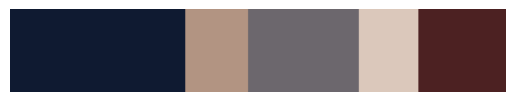

In [83]:
hist = centroid_histogram(labels)
bar = plot_colors(hist, colors)

plt.figure()
plt.axis("off")
plt.imshow(bar)
plt.show()


# let's combine them all

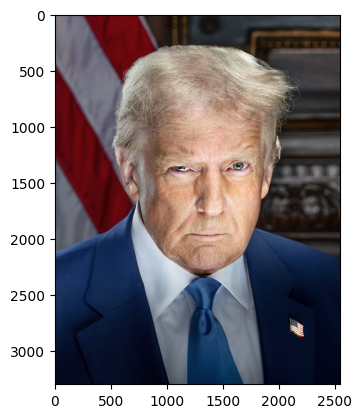

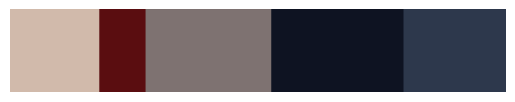

In [84]:
image = cv2.imread(r"C:\Users\rhyth\Desktop\open_cv\Histograms & K-Means for Dominant Colors\TrumpPortrait.jpg")
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(image)
plt.show()
reshaped_image = image.reshape((-1, 3))
kmeans = KMeans(n_clusters=5)
kmeans.fit(reshaped_image)
colors = kmeans.cluster_centers_.astype(int)
labels = kmeans.labels_
hist = centroid_histogram(labels)
bar = plot_colors(hist, colors)

plt.figure()
plt.axis("off")
plt.imshow(bar)
plt.show()


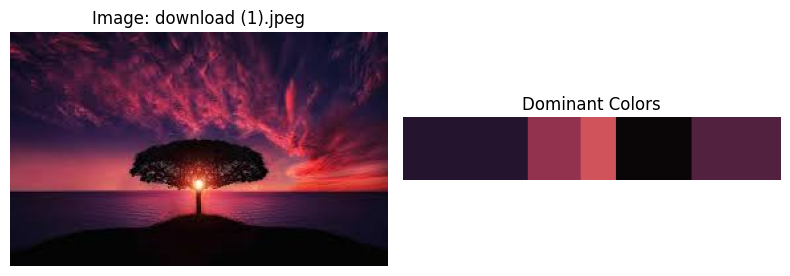

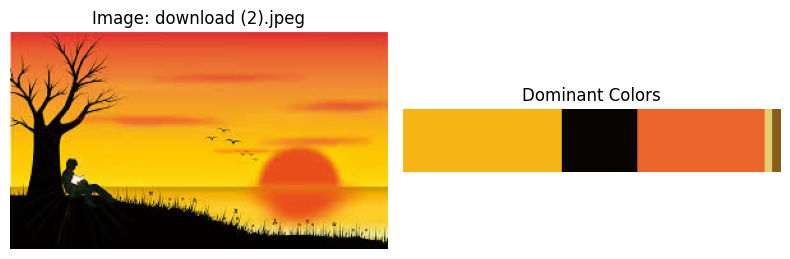

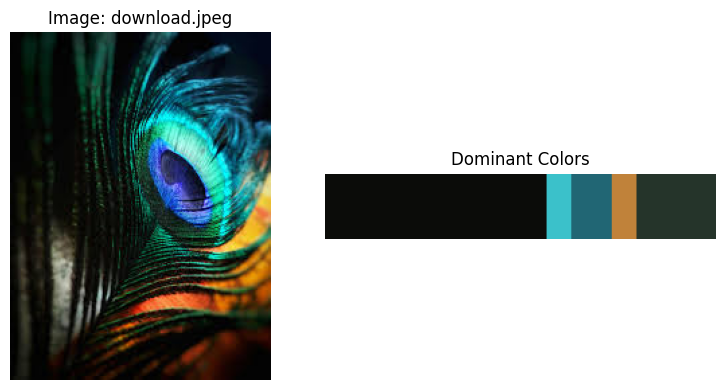

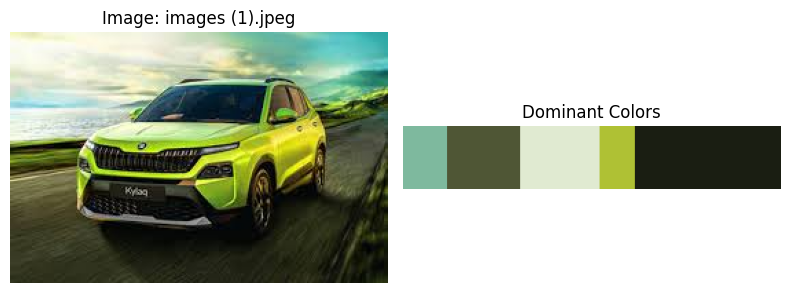

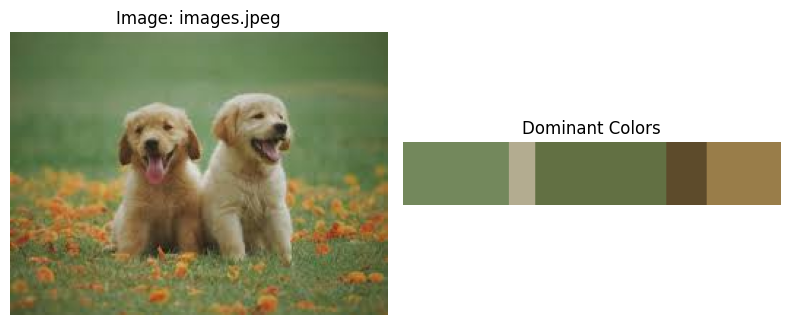

In [85]:
# Path to your image folder
folder_path = r"C:\Users\rhyth\Desktop\open_cv\Histograms & K-Means for Dominant Colors\images"

# List all image files in the folder
image_files = [f for f in os.listdir(folder_path) if f.lower().endswith(('.jpg', '.jpeg', '.png'))]

for image_file in image_files:
    image_path = os.path.join(folder_path, image_file)
    image = cv2.imread(image_path)
    if image is None:
        continue  # Skip unreadable files

    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    reshaped_image = image.reshape((-1, 3))

    # KMeans clustering
    kmeans = KMeans(n_clusters=5, random_state=42)
    kmeans.fit(reshaped_image)
    colors = kmeans.cluster_centers_.astype(int)
    labels = kmeans.labels_
    hist = centroid_histogram(labels)
    bar = plot_colors(hist, colors)

    # Plot the original image
    plt.figure(figsize=(8, 4))
    plt.subplot(1, 2, 1)
    plt.imshow(image)
    plt.title(f"Image: {image_file}")
    plt.axis("off")

    # Plot the color histogram bar
    plt.subplot(1, 2, 2)
    plt.imshow(bar)
    plt.title("Dominant Colors")
    plt.axis("off")

    plt.tight_layout()
    plt.show()